In [1]:
import numpy as np 
import pandas as pd

# from-scratch implementation of PCA

In [2]:
class myPCA:
    def __init__(self,n_components : int  = 2, method : str = 'svd') -> None:
        """"
            The constructor of the PCA algorithm, 
        :param n_components : int, default = 2 
             The dimension in which the data will be reduced
        :param method: str, default = 'svd' 
            The way used by PCA to reduce the dimensionality of the data. 
        """ 
        
        self.__n_components = n_components 
        if method in ['svd','eigen']:
            self.__method = method 
        else:
            raise ValueError(f" ' {method} '  is not a method implemented in this model" ) 
    
    
    def fit(self, X : 'np.array'):
        """"
             The fitting method. 
        :param X : np.array 
            The data on which we want to fit the pca 
        """ 
        
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
            
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T) 
            
            #Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            #Sorting the list of tuples(eigenvalue, eigenvector) 
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:,i])
                             for  i in range ( len(self.eig_vals))]
            
            self.eig_pairs.sort(key = lambda x : x[0], reverse = True)
            
            #Calculating the explainet ration
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i/total) * 100
                                             for i in sorted(self.eig_vals, reverse = True)]
            self.cumulative_variance_ratio = np.cumsum( self.explained_variance_ratio) 
            
            #Creating the projections matrix
            self.matrix_w = np.hstack( 
                (self.eig_pairs[i][1].reshape(np.size(X,1),1)
                 for i in range (self.__n_components))
            )
            
        return self 
    
    def transform(self, X : 'np.array') -> 'np.array':
        """"
            The transform function. 
        :param X : np.array 
             The data thtat we must reduce. 
        """ 
        
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w) 
        

# Visualizing the data sample.

In [3]:
# Importing the diabetes dataset
import sklearn.datasets 
dataset = sklearn.datasets.load_diabetes()

In [4]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


# Plotting the 3 features and y-target as hue

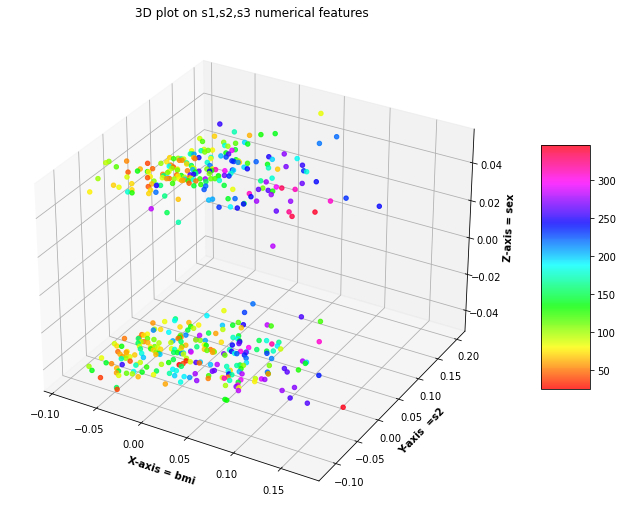

In [6]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = df['bmi'].values
y = df['s2'].values 
z = df['sex'].values 
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,  
                    
                    # Marker colors by target
                    c = dataset.target, 
                    
                    cmap = my_cmap,
                    marker = 'o')
 
plt.title("3D plot on s1,s2,s3 numerical features")
ax.set_xlabel('X-axis = bmi', fontweight ='bold')
ax.set_ylabel('Y-axis  =s2', fontweight ='bold')
ax.set_zlabel('Z-axis = sex', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [7]:
# Max val on feature columns 
print(dataset.data.max())  

# Max val on target column 
print(dataset.target.max())  

print('\n')   

# Min val on feature columns 
print(dataset.data.min())  

# Min val on target column 
print(dataset.target.min())

0.198787989657293
346.0


-0.137767225690012
25.0


### !!!  We can observe above that the y-target column is not standardized/scaled so that might be a problem on training the models on the data sample.  

## Anyways, this will be solved by applything standart scaler on X below


# Applying PCA on data sample

In [8]:
# Creating an instance of eigen method PCA algo
eig_pca = myPCA(method = 'eigen')  

# Creating an instance of SVD method PCA algo
svd_pca = myPCA(method = 'svd')  

# Creating an instance of PCA from sklearn 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [9]:
# Assigning the features and target columns.
X = dataset.data

In [10]:
# Using the standart Scaler on features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)  

In [11]:
# Fitting the data correspondingly to the instances. 

# PCA from sklrean
X1 = pca.fit_transform(X.copy())
X1 = pca.transform(X.copy()) 

# scratch PCA eigen method
X2 = eig_pca.fit(X.copy())
X2 = eig_pca.transform(X.copy()) 

# scratch PCA SVD method
X3 = svd_pca.fit(X.copy())
X3 = svd_pca.transform(X.copy())

c:\users\nicol\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


# Plotting the results

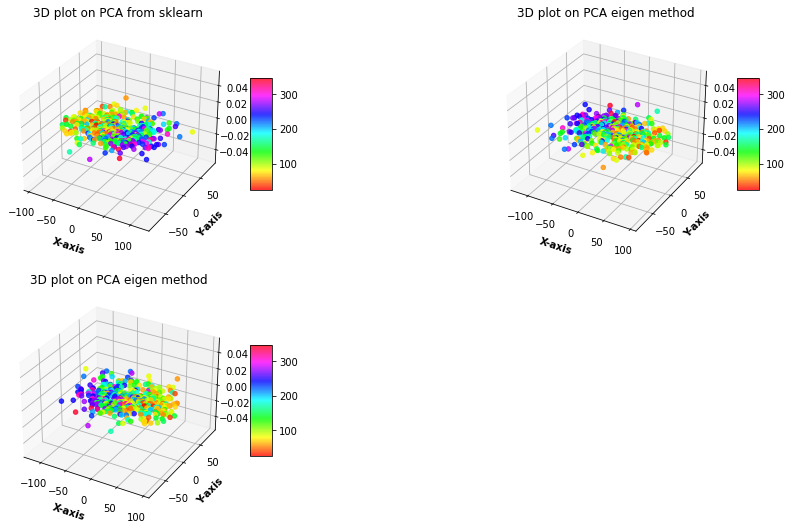

In [12]:

# Creating figure
fig = plt.figure(figsize = (16, 9))  

# 2x2 plot   


ax = fig.add_subplot(2, 2, 1, projection='3d')  
# Creating dataset
x = X1[:,0]
y = X1[:,1] 

#ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y,
                    alpha = 0.8,  

                    # Marker colors by target
                    c = dataset.target, 

                    cmap = my_cmap,
                  marker = 'o') 


plt.title(f"3D plot on PCA from sklearn")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)  


### 

ax = fig.add_subplot(2, 2, 2, projection='3d')  
# Creating dataset
x = X2[:,0]
y = X2[:,1] 

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y,
                    alpha = 0.8,  

                    # Marker colors by target
                    c = dataset.target, 

                    cmap = my_cmap,
                  marker = 'o') 


plt.title(f"3D plot on PCA eigen method")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)   

### 

ax = fig.add_subplot(2, 2, 3, projection='3d')  
# Creating dataset
x = X3[:,0]
y = X3[:,1] 

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y,
                    alpha = 0.8,  

                    # Marker colors by target
                    c = dataset.target, 

                    cmap = my_cmap,
                  marker = 'o') 


plt.title(f"3D plot on PCA eigen method")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)  

plt.show()

### Basically, obvious obervation if the reduction of dimensionality.
#### Also,  the data is spreading away from the origin of both Pricipal components. That means that the data plotted further, has the most influence on the sample. 
#### An likely ellipsoid was formed.  To reformulate the 2nd conclusion, In the direction in which the diameter is large, on X-axis( 1st PC ) the data varies a lot, while in the direction in which the diameter is small, the data varies litte. (on 2nd PC )

In [13]:
pca = PCA(n_components = 1) 
pca.fit_transform(X.copy()) 
pca.transform(X.copy())

array([[ 1.23453343e+01],
       [-5.95312352e+01],
       [ 5.72157492e+00],
       [ 1.03668439e+00],
       [-1.59034654e+01],
       [-8.33878436e+01],
       [-4.19169644e+01],
       [ 4.36426052e+01],
       [ 1.26780341e+01],
       [-4.46025345e+00],
       [-8.10713826e+01],
       [ 8.34481547e+00],
       [-3.35620842e+01],
       [ 6.69512924e+00],
       [-3.54349164e+01],
       [ 6.20957369e+01],
       [ 3.35301333e+00],
       [ 4.81069253e+01],
       [-2.43077013e+01],
       [-3.72451897e+01],
       [-4.22532317e+01],
       [-4.06074123e+01],
       [-3.52392469e+01],
       [ 7.93329818e+01],
       [-2.71120286e+01],
       [ 1.73424809e+00],
       [-8.16942135e+01],
       [-2.19659738e+01],
       [-3.69860388e+01],
       [-7.59734328e+00],
       [-2.46906461e+01],
       [-7.29160901e+01],
       [ 5.48327822e+01],
       [-6.03390846e+01],
       [-6.19517951e+01],
       [-1.47803362e+01],
       [-2.99432005e+00],
       [-2.95894282e+01],
       [ 8.1

In [14]:
pca.explained_variance_ratio_

array([0.40242142])

### We got a high ration for one Pricipal component, 1/2 of recommended of 0.8 sum to avoid overfitting.

# Got confused on plotting the line. ( Exaplained variance ratio)

#  Task2


In [15]:
#Importing dataset
dataset = sklearn.datasets.load_digits()

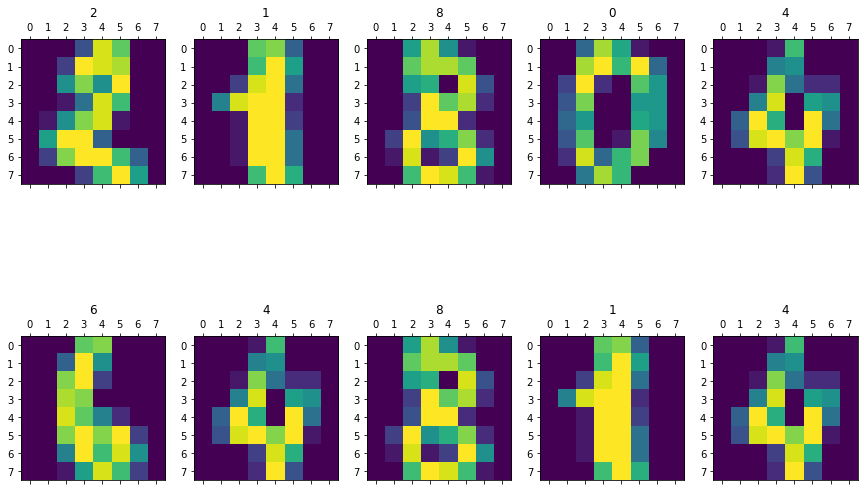

In [16]:
# Setting plotting params
f, ax = plt.subplots(2,5)    
f.set_figwidth(15)  
f.set_figheight(10)

#
for x in range(2): 
    for y in range(5):  
        # Random guess
        i = np.random.randint(10) 
        
        # Title
        ax[x, y].set_title(f'{i}')    
        
        # PLotting the matrix.
        ax[x, y].matshow(dataset.data[i].reshape(8,8))

In [17]:
#Initializing the PCA
pca = PCA(n_components = 2) 

# Applying scaling
sc = StandardScaler() 

# Scaling the data 
X = sc.fit_transform(dataset.data)
X = sc.transform(dataset.data)    

# Applying PCA  
X1 = pca.fit_transform(X.copy())
X1 = pca.transform(X.copy()) 

# Plotting the labeled data

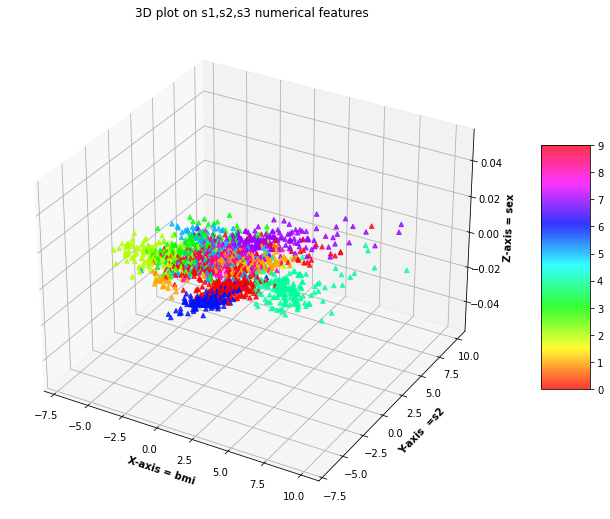

In [18]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = X1[:,0]
y = X1[:,1]


# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y,
                    alpha = 0.8,  
                    # Marker colors by target
                    c = dataset.target, 
                    
                    cmap = my_cmap,
                    marker = '^')
 
plt.title("3D plot on s1,s2,s3 numerical features")
ax.set_xlabel('X-axis = bmi', fontweight ='bold')
ax.set_ylabel('Y-axis  =s2', fontweight ='bold')
ax.set_zlabel('Z-axis = sex', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()